## Anomaliekurven der Gravitationsbeschleunigung für verschiedene Störkörper

Dieses Jupyter Notebook bsteht aus zwei Teilen:
1. Teil zu Aufgabe 2: Berechnung von Anomliekurven für ein Zeischicht- und ein Dreischicht-Modell für verschiedene Dichtewerte
2. Teil zu Aufgabe 3: Berechnung von Anomaliekurven für einen Störkörper mit variabler Dichte und Tiefenlage.

Führen Sie die Skripte nacheinander aus, indem Sie Strg+Enter drücken (vorher mit der Maus in das jeweilige Skript klicken). 

In [21]:
''' Berechnet eine Isolinienkarte für Punkte (x,y) und Messwerte für Feldanomalien (Gravimetrie, Magnetik) 

    © Nepomuk Boitz, April 2020, boitz@geophysik.fu-berlin.de
'''


import numpy as np
import matplotlib.pyplot as plt
# p - Anzahl der Messpunkte
def get_anomaly_new(rho,xv,zv,p):
    [rho1,xv1,zv1] = extend_model(rho,xv,zv,p)
    G=6.67508e-11
    x_obs=np.linspace(np.min(xv),np.max(xv),np.shape(xv)[1])
    z_obs=0*np.ones(len(x_obs))
    gz = np.zeros(len(x_obs));
    gh = np.zeros(len(x_obs));
    V = 1; 
    for k in range(len(x_obs)):
        pos_x = (np.sqrt((xv1-x_obs[k])**2 + (zv1-z_obs[k])**2) <= p)# + .05*(zv-z_obs[k])**2) # bolean
        r=np.sqrt((x_obs[k]-xv1*(pos_x))**2 + (z_obs[k]-zv1*(pos_x))**2)+10**(-7) # distance to observation point#
        rz=(z_obs[k]-zv1*(pos_x))/r # z-component of unit vector to observation point
        gz[k]=-G*V*np.sum(rz*(rho1*pos_x)/r**2) # sum over all masses
    return gz

def extend_model(mod,xv,zv,r):
    x_min = np.min(xv) - r
    x_max = np.max(xv) + r
    x=np.linspace(x_min,x_max,nx+2*r)
    z=np.linspace(np.min(zv),np.max(zv),np.shape(xv)[0])
    xv1,zv1=np.meshgrid(x,z,indexing='xy')
    mod1 =np.zeros(np.shape(xv1)) 
    mod1[:,r:r+np.shape(xv)[1]] = mod
    for i in range(r):
        mod1[:,i] = mod[:,0]
    for i in range(r+np.shape(xv)[1],np.shape(xv1)[1]):
        mod1[:,i] = mod[:,np.shape(xv)[1]-1]
    #mod1[:,np.shape(xv)[0]:-1] = mod[:,0]
    return [mod1,xv1,zv1]

def circular_inclusion(rho,x,z,x_size,z_size,rho_val): 
    for i in range(np.shape(rho)[1]):
        for j in range(np.shape(rho)[0]):
            if np.sqrt(((x-i)/x_size)**2 + ((z-j)/z_size)**2) < 1:
                rho[j,i] = rho_val
    return rho
def retangular_inclusion(rho,x,z,x_size,z_size,rho_val): 
    rho[z-round(z_size):z+round(z_size),x-round(x_size):x+round(x_size)] = rho_val
    return rho
            
x_min = -100; 
x_max = 100; 
z_min = 0; 
z_max = 100; 
h=1.
V=h**3

nx=int((x_max-x_min)/h)+1
nz=int((z_max-z_min)/h)+1

x=np.linspace(x_min,x_max,nx)
z=np.linspace(z_min,z_max,nz)

xv,zv=np.meshgrid(x,z,indexing='xy')


# Teil 1: Zwei- und Dreischichtmodelle

In diesem Beispiel werden für zwei unterschiedliche Modelle mit unterschiedlichen Dichteverteilungen die entsprechenden Anomaliekurven berechnet.

Verändern Sie die Dichtewerte und schauen Sie sich die resultierenden Anomaliekurven an, um die Fragen zu Aufgabe 2 auf dem Übungszettel zu beantworten.


In [19]:
# Hier können Sie die Dichtewerte der einzelnen Schichten verändern:

## Modell 1: Dichte 
# Schicht 1
rho1 = 3500;
# Schicht 2
rho2 = 5500; 

mod1=np.zeros(np.shape(xv)) # To initialize, set all densities to zero.
mod1[0:-1,:]=rho1 # Set density below the surface of the Earth.
mod1[30:100,:]=rho2 # Set density below the surface of the Earth.
mod1[5:80,75:125]=rho2 # Set density below the surface of the Earth.


## Modell 2: Dichte  

# Schicht 1
rho1 = 500; 
# Schicht 2
rho2 = 3500;
# Schicht 3
rho3 = 5500; 

mod2=np.zeros(np.shape(xv)) # To initialize, set all densities to zero.
mod2[0:-1,:]=rho1 # Set density below the surface of the Earth.
mod2[30:100,:]=rho2 # Set density below the surface of the Earth.
mod2[60:100,:]=rho3 # Set density below the surface of the Earth.
mod2[5:80,75:125]=rho2 # Set density below the surface of the Earth.


AttributeError: 'PolyCollection' object has no property 'shading'

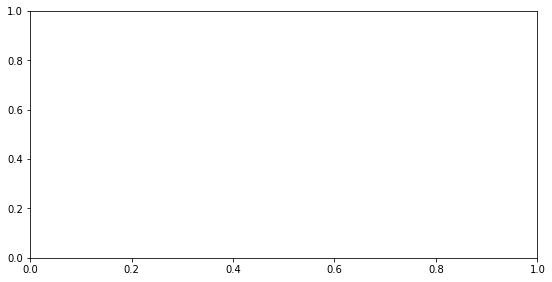

In [25]:
# In diesem Skript bitte keine Änderungen vornehmen!!!

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.pcolor(xv,-zv,mod1,shading='auto')
cbar = plt.colorbar()
cbar.set_label('Dichte [kg/m^3]', rotation=90)
plt.title('Dichteverteilung [kg/m^3]')
plt.ylabel('Tiefe [m]')
plt.xlabel('Horizontale Entfernung [m]')
plt.subplot(2,2,2)
gz = get_anomaly_new(mod1,xv,zv,100)
plt.plot(np.linspace(np.min(xv),np.max(xv),len(gz)),gz-gz[0],'.')
plt.title('Graviationsanomalie [m/s^2]')
plt.xlabel('Horizontale Entfernung [m]')
plt.ylabel(' Delta g[m/s^2]')

plt.subplot(2,2,3)
plt.pcolor(xv,-zv,mod2,shading='auto')
cbar = plt.colorbar()
cbar.set_label('Dichte [kg/m^3]', rotation=90)
plt.title('Dichteverteilung [kg/m^3]')
plt.ylabel('Tiefe [m]')
plt.xlabel('Horizontale Entfernung [m]')
plt.subplot(2,2,4)
gz1 = get_anomaly_new(mod2,xv,zv,100)
plt.plot(np.linspace(np.min(xv),np.max(xv),len(gz)),gz1-gz1[0],'.')
plt.title('Graviationsanomalie [m/s^2]')
plt.xlabel('Horizontale Entfernung [m]')
plt.ylabel(' Delta g[m/s^2]')
plt.show()


## Teil 2: Größe und Lage eines Störkörpers 

In diesem Beispiel wird die Anomaliekurve für einen Störkörper berechnet. In der nächsten Zelle können Sie die Lage und die Größe des Störkörpers verändern.

Führen Sie das Skript in der übernächsten Zelle aus, um sich die resultierende Anomaliekurve anzuschauen.

Zum Vergleich wird ein sog. "Baseline-Modell" (Standardmodell) generiert um die Unterschiede zu dem neuen Modell darzustellen.

Variieren Sie die Modellparameter um die Fragen in Aufgabe 3 des Übungszettels zu beantworten.


In [13]:
## Modellparameter 

z = 30;       # Tiefe des Störkörpers [m]
x = 100;      # Horizontale Position des Störkörpers [m]
x_size = 20;  # Horizontale Ausdehnung [m]
z_size = 20;  # Vertikale Ausdehnung [m]
rho2 = 4000;  # Dichte des Störkörpers [kg/m^3]
in_type = 0;  # 1: Störkörper ist ein Rechteck, 0: Störkörper ist eine Ellipse



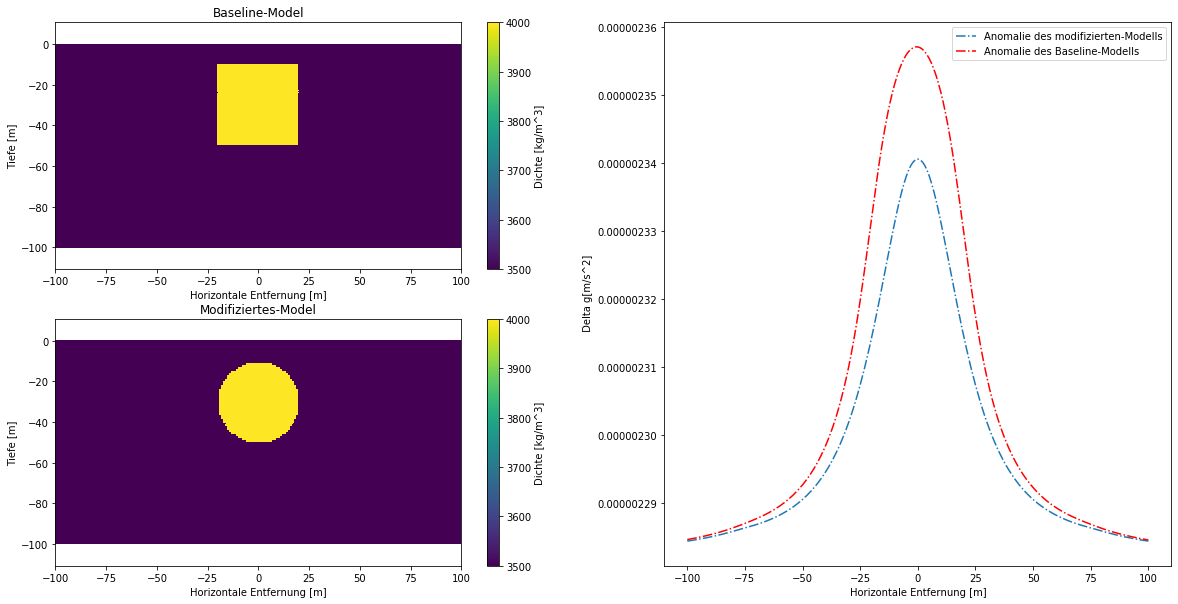

In [14]:
# Größe und Lage eines Störkörpers 

## In diesem Skript bitte keine Änderungen vornehmen!!!

# Baseline-Modell
model2 = 3500*np.ones(np.shape(xv))
model_base = np.copy(model2); 
model_base[30-20:30+20,100-20:100+20] = 4000 
if in_type == 0:
    model2 = circular_inclusion(model2,x,z,x_size,z_size,rho2)
elif in_type == 1:
    model2 = retangular_inclusion(model2,x,z,x_size,z_size,rho2)
#model2[z-z_size:z+z_size,x-x_size:x+x_size] = rho2

# Anomalie berechnen
gz = get_anomaly_new(model2,xv,zv,100)
gz_base = get_anomaly_new(model_base,xv,zv,100)
# Ergebnisse plotten
plt.figure(figsize=(20,10))
plt.subplot(2,2,3)
plt.pcolor(xv,-zv,model2)
cbar = plt.colorbar()
cbar.set_label('Dichte [kg/m^3]', rotation=90)

plt.axis('equal')
plt.ylabel('Tiefe [m]')
plt.xlabel('Horizontale Entfernung [m]')
plt.title('Modifiziertes-Model')
plt.subplot(2,2,1)
plt.pcolor(xv,-zv,model_base)

cbar = plt.colorbar()
cbar.set_label('Dichte [kg/m^3]', rotation=90)

plt.axis('equal')
plt.title('Baseline-Model')
plt.ylabel('Tiefe [m]')
plt.xlabel('Horizontale Entfernung [m]')

plt.subplot(1,2,2)
plt.plot(np.linspace(np.min(xv),np.max(xv),len(gz)),gz,'-.')
plt.plot(np.linspace(np.min(xv),np.max(xv),len(gz)),gz_base,'r-.',)
plt.legend(['Anomalie des modifizierten-Modells','Anomalie des Baseline-Modells'])
plt.xlabel('Horizontale Entfernung [m]')
plt.ylabel(' Delta g[m/s^2]')
plt.show()
